# Exercises using Seaborn
This week's exercises will be dealing with power plant data.
## Preparation
Import the relevant librarys Seaborn, matplotlib and of course pandas.

In [340]:
import pandas as pd
from matplotlib import pyplot as plt
# Display plots inside notebook
%matplotlib inline
import seaborn as sns

Now import the file *conventional_power_plants.csv* from moodle using pandas.

In [341]:
df = pd.read_csv('conventional_power_plants_DE.csv',parse_dates=['commissioned'])
df.dtypes

id                               object
name_bnetza                      object
block_bnetza                     object
name_uba                         object
company                          object
street                           object
postcode                         object
city                             object
state                            object
country_code                     object
capacity_net_bnetza             float64
capacity_gross_uba              float64
fuel                             object
technology                       object
chp                              object
chp_capacity_uba                 object
commissioned             datetime64[ns]
commissioned_original            object
retrofit                        float64
shutdown                        float64
status                           object
type                             object
lat                             float64
lon                             float64
eic_code_plant                   object


In [342]:
pd.set_option('display.max_columns', None)
df.head()

,id,name_bnetza,block_bnetza,name_uba,company,street,postcode,city,state,country_code,capacity_net_bnetza,capacity_gross_uba,fuel,technology,chp,chp_capacity_uba,commissioned,commissioned_original,retrofit,shutdown,status,type,lat,lon,eic_code_plant,eic_code_block,efficiency_data,efficiency_source,efficiency_estimate,energy_source_level_1,energy_source_level_2,energy_source_level_3,eeg,network_node,voltage,network_operator,merge_comment,comment
0,BNA0012a,Werkskraftwerk Sappi Alfeld,Turbine 5,NaN,Sappi Alfeld GmbH,Mühlenmarsch 1,31061,Alfeld,Niedersachsen,DE,16.0,NaN,Biomass and biogas,Steam turbine,yes,NaN,1988-01-01,1988,NaN,NaN,operating,NaN,51.984761,9.822831,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,6,Überlandwerk Leinetal GmbH,NaN,NaN
1,BNA0021,HKW Altenstadt,NaN,NaN,Heizkraftwerk Altenstadt GmbH & Co. KG,Triebstraße 90,86972,Altenstadt,Bayern,DE,9.8,NaN,Biomass and biogas,Steam turbine,no,NaN,1999-01-01,1999,NaN,NaN,operating,NaN,47.797140,10.858740,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,MS,LEW Verteilnetz GmbH,NaN,NaN
2,BNA0027,Zellstoff Stendal GmbH,-,Arneburg,Zellstoff Stendal GmbH,Goldbecker Straße 1,39596,Arneburg,Sachsen-Anhalt,DE,138.9,147.0,Biomass and biogas,Steam turbine,yes,600,2004-01-01,2004,NaN,NaN,operating,CHP,52.727130,12.011150,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,DE0075603959600000E00000000013559 DE0075603959...,30,Infrastrukturbetrieb der Stadt Arneburg,List matching type: Single UBA power plant ass...,NaN
3,BNA1337b,Blockheizkraftwerk 1,Blockheizkraftwerk 1,NaN,DS Smith Paper Deutschland GmbH,Weichertstr. 7,63741,Aschaffenburg,Bayern,DE,1.1,NaN,Biomass and biogas,Steam turbine,yes,NaN,2005-01-01,2005,NaN,NaN,operating,NaN,49.988218,9.155761,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,20,Aschaffenburger Versorgungs GmbH,NaN,NaN
4,BNA1337c,Blockheizkraftwerk 2,Blockheizkraftwerk 2,NaN,DS Smith Paper Deutschland GmbH,Weichertstr. 7,63741,Aschaffenburg,Bayern,DE,0.8,NaN,Biomass and biogas,Steam turbine,yes,NaN,2010-01-01,2010,NaN,NaN,operating,NaN,49.988218,9.155761,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,20,Aschaffenburger Versorgungs GmbH,NaN,NaN


## Excercise 1: Scatterplots

1. Create a scatterplot that shows the development of the the capacity of the german power plants over the years.

(0, 1480.5002161941961)

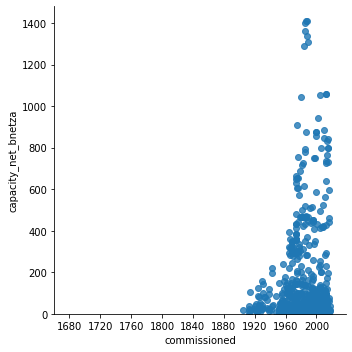

In [343]:
sns.lmplot(x='commissioned', y='capacity_net_bnetza', fit_reg=False, data=df)
plt.ylim(0, None)

2. Change the scatterplot so that it displays the points by the type of technology they use.

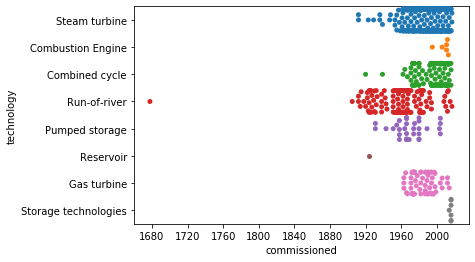

In [344]:
sns.swarmplot(x='commissioned', y='technology', data=df)

## Exercise 2: Boxplots
1. Create a boxplot showing the distribution of the capacity by technology and ensure that the width of the diagram is at minimum 15.

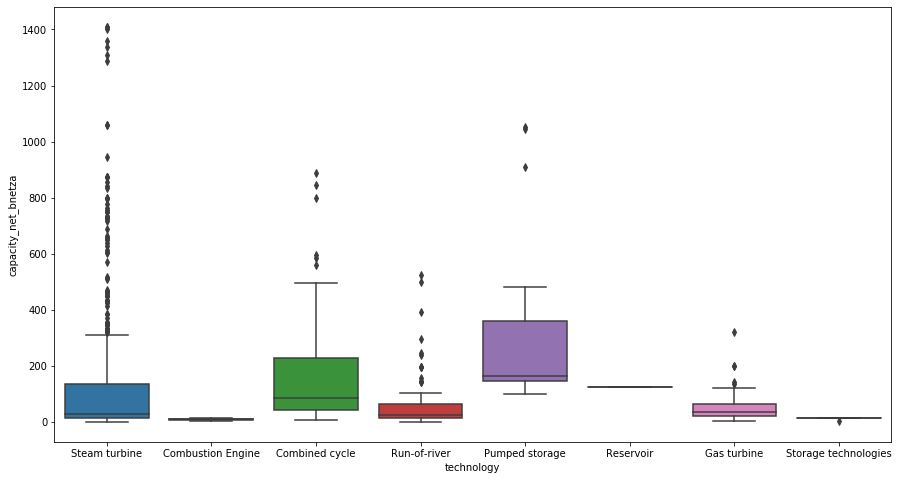

In [345]:
plt.figure(figsize=(15, 8))
df_cap_tech = df[['technology', 'capacity_net_bnetza']].copy()
#sns.boxplot(data=df_cap_tech)
sns.boxplot(data=df_cap_tech, x="technology", y="capacity_net_bnetza")

2. Change to type of plot from boxplot to swarmplot and ensure that following coloring
    * grey = Steam turbine
    * red = Combustion Engine
    * yellow = Combined cycle
    * blue = Run-of-river
    * light-blue = Pumped storage
    * dark blue = Reservoir
    * orange = Gas turbine
    * purple = Storage technologies
    
 You may find it useful to take a look at https://www.w3schools.com/colors/colors_picker.asp as a starting point.

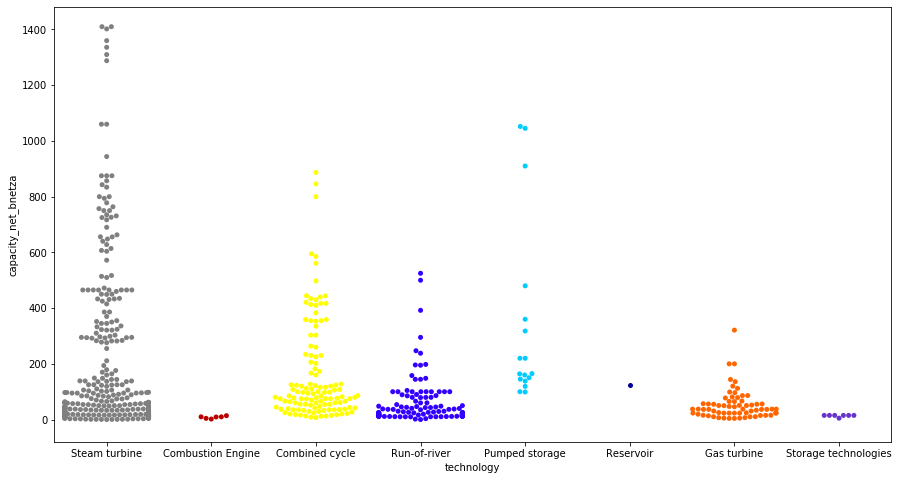

In [346]:
tech_type_colors = ['#808080',  # Steam Turbine
                    '#B80000',  # Combustion Engine
                    '#FFFF00',  # Conbined cylce
                    '#3300FF',  # Run-of-river
                    '#00CCFF',  # Pumped storage
                    '#000099',  # Reservori
                    '#FF6600',  # Gas turbine
                    '#6633CC',  # Storage technologies
                   ]

plt.figure(figsize=(15, 8))
sns.swarmplot(x='technology', y='capacity_net_bnetza', data=df, 
              palette=tech_type_colors)

## Exercise 3: Barplot
1. Create a barchart showing the number of plants per year for 'Bayern'. This obviously requires some data munging with pandas.

Hints:
* Take look at the data frame method <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html">*loc*</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html">*isin*</a>.
* Also, take a look at the possible chart types of <a href="https://seaborn.pydata.org/api.html">seaborn</a>.

In [347]:
df_bayern = df[df['state'] == 'Bayern'].groupby('commissioned').size() # returns series
df_bayern=pd.DataFrame(df_bayern) # convert series to dataframe
df_bayern['index_col'] = df_bayern.index # add index column
df_bayern.columns = ['amount', 'year']
df_bayern

,amount,year
commissioned,,
1920-01-01,2,1920-01-01
1922-01-01,2,1922-01-01
1924-01-01,4,1924-01-01
1925-01-01,1,1925-01-01
1927-01-01,1,1927-01-01
...,...,...
2012-01-01,1,2012-01-01
2013-01-01,2,2013-01-01
2014-01-01,1,2014-01-01


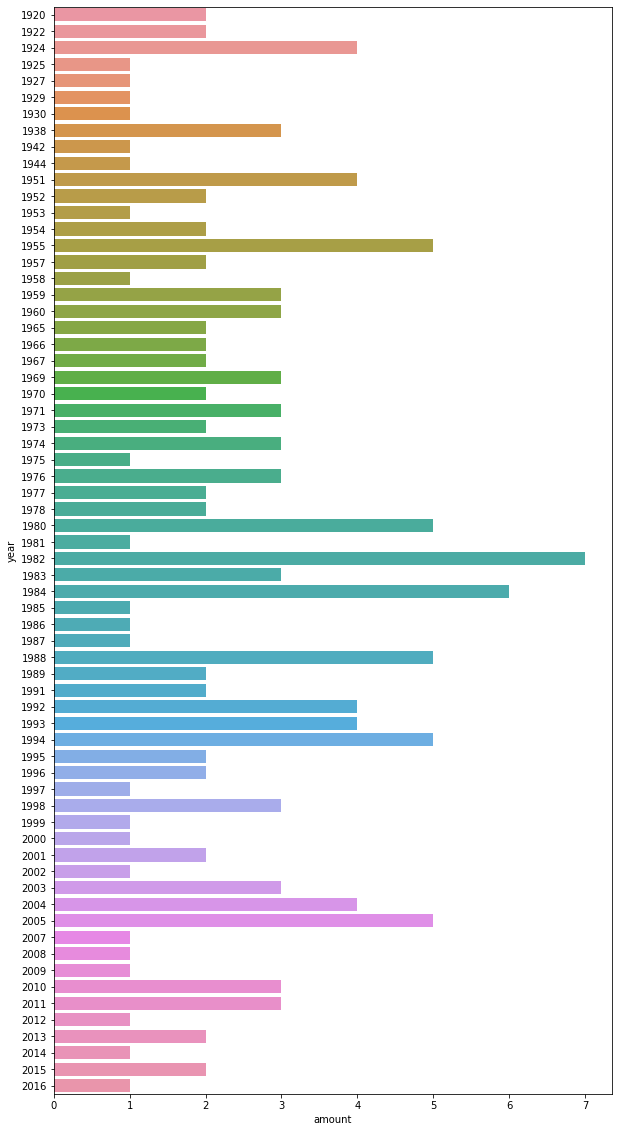

In [348]:
plt.figure(figsize=(10, 20))
ax = sns.barplot(data=df_bayern, x='amount', y='year', orient = 'h')
ax.set_yticklabels(df_bayern['year'].dt.strftime('%Y'))
plt.show()

In [349]:
df.loc[df['state'] == 'Bayern']

,id,name_bnetza,block_bnetza,name_uba,company,street,postcode,city,state,country_code,capacity_net_bnetza,capacity_gross_uba,fuel,technology,chp,chp_capacity_uba,commissioned,commissioned_original,retrofit,shutdown,status,type,lat,lon,eic_code_plant,eic_code_block,efficiency_data,efficiency_source,efficiency_estimate,energy_source_level_1,energy_source_level_2,energy_source_level_3,eeg,network_node,voltage,network_operator,merge_comment,comment
1,BNA0021,HKW Altenstadt,NaN,NaN,Heizkraftwerk Altenstadt GmbH & Co. KG,Triebstraße 90,86972,Altenstadt,Bayern,DE,9.8,NaN,Biomass and biogas,Steam turbine,no,NaN,1999-01-01,1999,NaN,NaN,operating,NaN,47.797140,10.858740,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,MS,LEW Verteilnetz GmbH,NaN,NaN
3,BNA1337b,Blockheizkraftwerk 1,Blockheizkraftwerk 1,NaN,DS Smith Paper Deutschland GmbH,Weichertstr. 7,63741,Aschaffenburg,Bayern,DE,1.1,NaN,Biomass and biogas,Steam turbine,yes,NaN,2005-01-01,2005,NaN,NaN,operating,NaN,49.988218,9.155761,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,20,Aschaffenburger Versorgungs GmbH,NaN,NaN
4,BNA1337c,Blockheizkraftwerk 2,Blockheizkraftwerk 2,NaN,DS Smith Paper Deutschland GmbH,Weichertstr. 7,63741,Aschaffenburg,Bayern,DE,0.8,NaN,Biomass and biogas,Steam turbine,yes,NaN,2010-01-01,2010,NaN,NaN,operating,NaN,49.988218,9.155761,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,20,Aschaffenburger Versorgungs GmbH,NaN,NaN
26,BNA0553,BMHKW-BinderHolz,NaN,NaN,BinderHolz Deutschland GmbH,Einsteinstraße 9,85092,Kösching,Bayern,DE,15.1,NaN,Biomass and biogas,Steam turbine,yes,NaN,2007-01-01,2007,NaN,NaN,operating,NaN,48.791230,11.506790,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,UW GROM,110,Bayernwerk AG,NaN,NaN
33,BNA0692,KWK Neumarkt,NaN,NaN,Pfleiderer Neumarkt GmbH,Dreichlinger Str. 76,92318,Neumarkt i.d. Oberpfalz,Bayern,DE,15.6,NaN,Biomass and biogas,Steam turbine,yes,NaN,1997-01-01,1997,NaN,NaN,operating,NaN,49.261330,11.451600,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,Übergabe KWK,10,Stadtwerke Neumarkt i.d.OPf.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,BNA0895,GKS,entfällt,NaN,GKS Gemeinschaftskraftwerk Schweinfurt GmbH,Hafenstraße 30,97424,Schweinfurt,Bayern,DE,24.4,NaN,Waste,Steam turbine,yes,NaN,1994-01-01,1994,NaN,NaN,operating,NaN,50.029690,10.224000,NaN,NaN,NaN,NaN,0.33,Other or unspecified energy sources,Waste,NaN,no,Stadtwerke SW,20,Stadtwerke Schweinfurt GmbH,NaN,NaN
797,BNA0969a,Nord 1,1,NaN,SWM Services GmbH,NaN,85774,Unterföhring,Bayern,DE,18.0,NaN,Waste,Steam turbine,yes,NaN,1992-01-01,1992,NaN,NaN,operating,NaN,48.180506,11.639612,NaN,NaN,NaN,NaN,0.33,Other or unspecified energy sources,Waste,NaN,no,HUW Föhring,110,SWM Infrastruktur GmbH,NaN,NaN
798,BNA0969c,Nord 3,3,NaN,SWM Services GmbH,NaN,85774,Unterföhring,Bayern,DE,22.0,NaN,Waste,Steam turbine,yes,NaN,1984-01-01,1984,NaN,NaN,operating,NaN,48.180506,11.639612,NaN,NaN,NaN,NaN,0.33,Other or unspecified energy sources,Waste,NaN,no,HUW Föhring,110,SWM Infrastruktur GmbH,NaN,NaN
802,BNA1449a,Turbosatz 1,NaN,NaN,Zweckverband Abfallwirtschaft Raum Würzburg,Gattingerstr. 31,97076,Würzburg,Bayern,DE,8.7,NaN,Waste,Steam turbine,yes,NaN,1984-01-01,1984,NaN,NaN,operating,NaN,49.793000,9.994060,NaN,NaN,NaN,NaN,0.33,Other or unspecified energy sources,Waste,NaN,no,SH 399 MHKW,20,Mainfranken Netze GmbH,NaN,NaN
